In [1]:
import tensorflow as tf

from tqdm import tqdm_notebook

In [2]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

(40000, 32, 32, 3) (40000, 1)


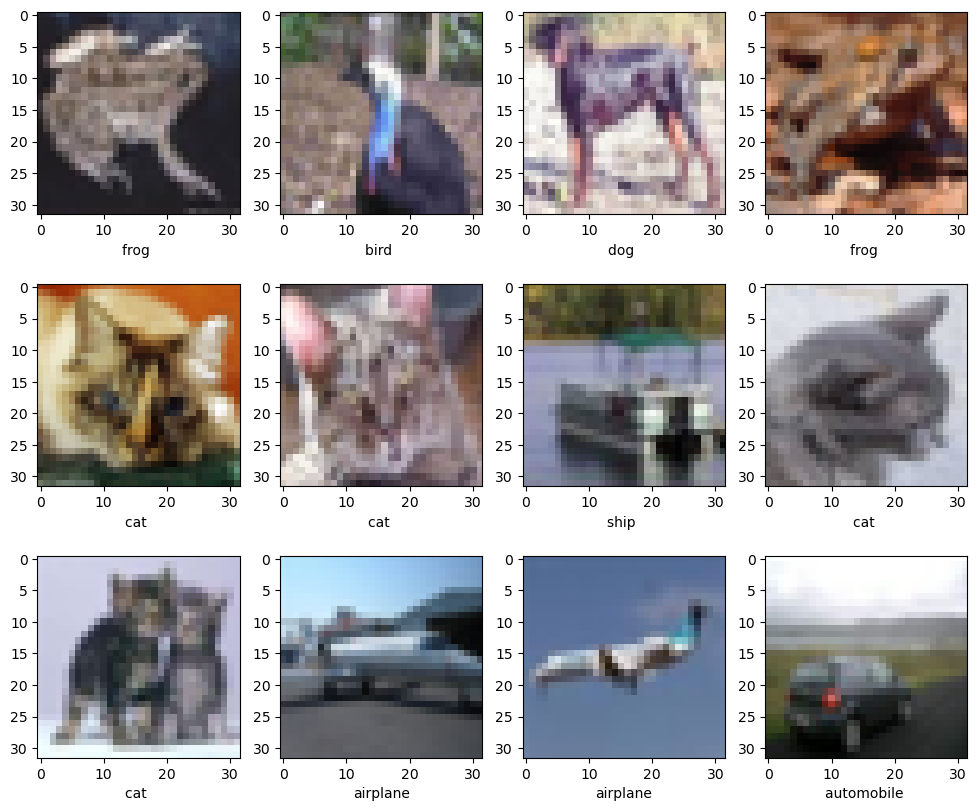

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

In [4]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [5]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

In [10]:
import keras

## Задание 1.1

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [11]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

1/1 [==============================] - 0s 11ms/step
Успех!


In [12]:
y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))

In [13]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs')]

In [14]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_val, y_val, epochs=30, callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 2s 6ms/step - loss: 2.2871 - accuracy: 0.1331
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 2.1444 - accuracy: 0.2221
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9387 - accuracy: 0.2980
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.7984 - accuracy: 0.3560
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 1.7008 - accuracy: 0.3900
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.6218 - accuracy: 0.4212
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5784 - accuracy: 0.4351
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5353 - accuracy: 0.4532
Epoch 9/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5002 - accuracy: 0.4652
Epoch 10/30
313/313 [==============================] - 2s 6ms/step - loss: 1.4623 - accuracy: 0.4787

In [16]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print(f"\n Test_acc = {test_acc}")
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 [==============================] - 1s 3ms/step

 Test_acc = 0.5067
 Not bad!


## Задание 1.2

## Карманная сверточная сеть

**Задание 1.2 (обязательно)** Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [35]:
%%time

hid_size = 400
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(hid_size, activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(filters=10,
                               kernel_size=(3, 3),
                               padding='same',
                               activation='relu',
#                                input_shape=X_train.shape[1:]
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_val, y_val, epochs=20, callbacks=callbacks)

model.summary()

Epoch 1/20
313/313 [==============================] - 40s 128ms/step - loss: 1.9242 - accuracy: 0.3279
Epoch 2/20
313/313 [==============================] - 46s 148ms/step - loss: 1.6542 - accuracy: 0.4138
Epoch 3/20
313/313 [==============================] - 60s 192ms/step - loss: 1.5860 - accuracy: 0.4386
Epoch 4/20
313/313 [==============================] - 65s 208ms/step - loss: 1.4923 - accuracy: 0.4725
Epoch 5/20
313/313 [==============================] - 61s 195ms/step - loss: 1.4235 - accuracy: 0.4996
Epoch 6/20
313/313 [==============================] - 63s 200ms/step - loss: 1.3702 - accuracy: 0.5176
Epoch 7/20
313/313 [==============================] - 65s 209ms/step - loss: 1.3132 - accuracy: 0.5424
Epoch 8/20
313/313 [==============================] - 74s 235ms/step - loss: 1.2574 - accuracy: 0.5617
Epoch 9/20
313/313 [==============================] - 73s 232ms/step - loss: 1.2145 - accuracy: 0.5734
Epoch 10/20
313/313 [==============================] - 70s 224ms/step - l

In [34]:
from sklearn.metrics import accuracy_score

predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 [==============================] - 9s 28ms/step

 Test_acc = 0.471


AssertionError: Not good enough. Back to the drawing board :)